In [85]:
import numpy as np
import pandas as pd

In [86]:
df=pd.read_csv('spam.csv', encoding='latin-1')

In [87]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2619,spam,<Forwarded from 21870000>Hi - this is your Mai...,NaN,NaN,NaN
3561,ham,Still chance there. If you search hard you wil...,NaN,NaN,NaN
3445,ham,"Mon okie lor... Haha, best is cheap n gd food ...",NaN,NaN,NaN
4214,ham,No dear i was sleeping :-P,NaN,NaN,NaN
5329,ham,"Sir, waiting for your letter.",NaN,NaN,NaN


In [88]:
df.shape

(5572, 5)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [90]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [91]:
df.sample(5)


,v1,v2
736,ham,Thanks for looking out for me. I really apprec...
2631,spam,"URGENT! Your mobile No 077xxx WON a å£2,000 Bo..."
511,ham,Prabha..i'm soryda..realy..frm heart i'm sory
3714,ham,"I am late,so call you tomorrow morning.take ca..."
4492,ham,"LOL .. *grins* .. I'm not babe, but thanks for..."


In [92]:
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
5336,ham,Sounds better than my evening im just doing my...
2760,ham,I dont thnk its a wrong calling between us
2577,ham,Hey whats up? U sleeping all morning?
3637,spam,Customer service announcement. We recently tri...
3483,ham,Tell my bad character which u Dnt lik in me. ...


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [94]:
df['target']=encoder.fit_transform(df['target'])

In [95]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(403)

In [98]:
df=df.drop_duplicates(keep='first')

In [99]:
df.duplicated().sum()


np.int64(0)

In [100]:
df.shape

(5169, 2)

In [101]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

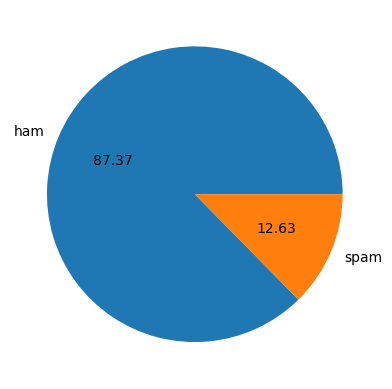

In [103]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [104]:
import nltk

In [105]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [106]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niloy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\niloy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [107]:
df['num_characters']=df['text'].apply(len)

In [108]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [109]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) 

In [110]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [111]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [112]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [113]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [114]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [115]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [116]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

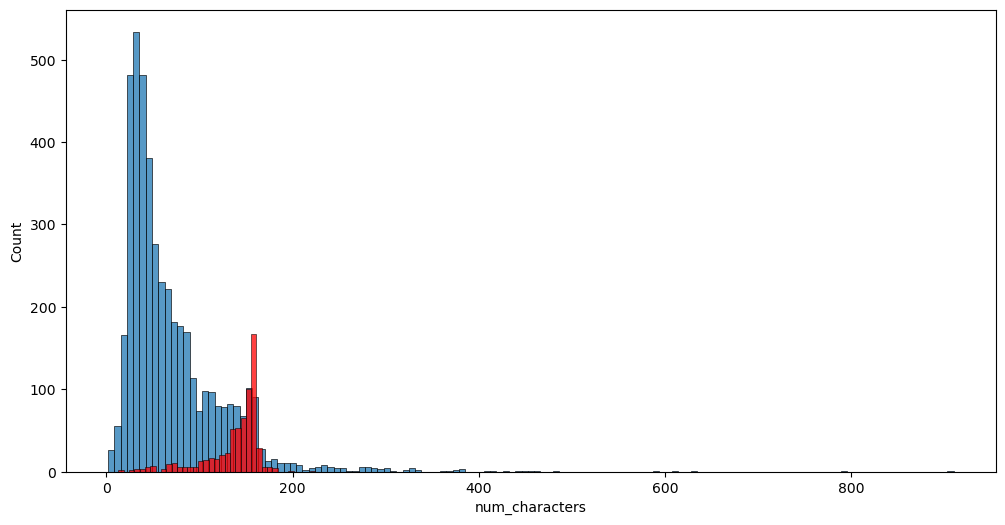

In [117]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

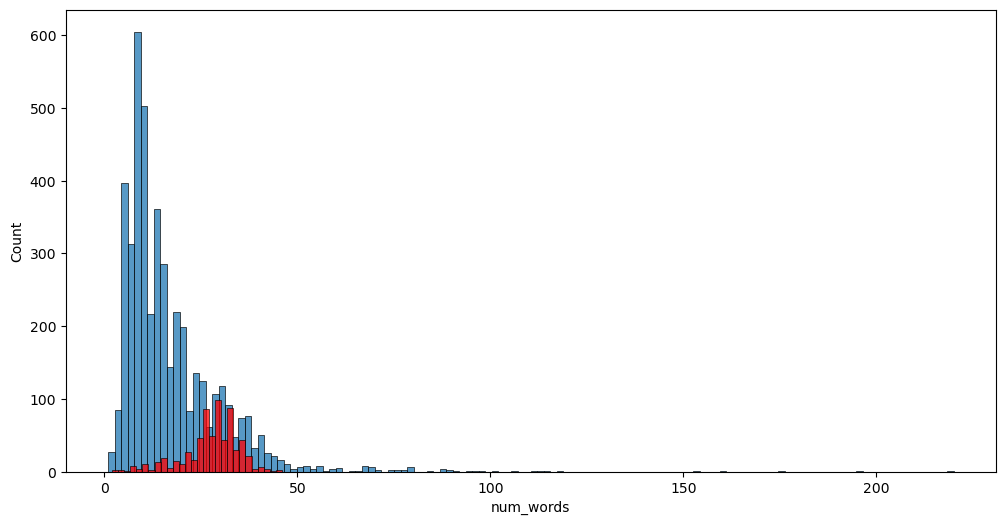

In [118]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

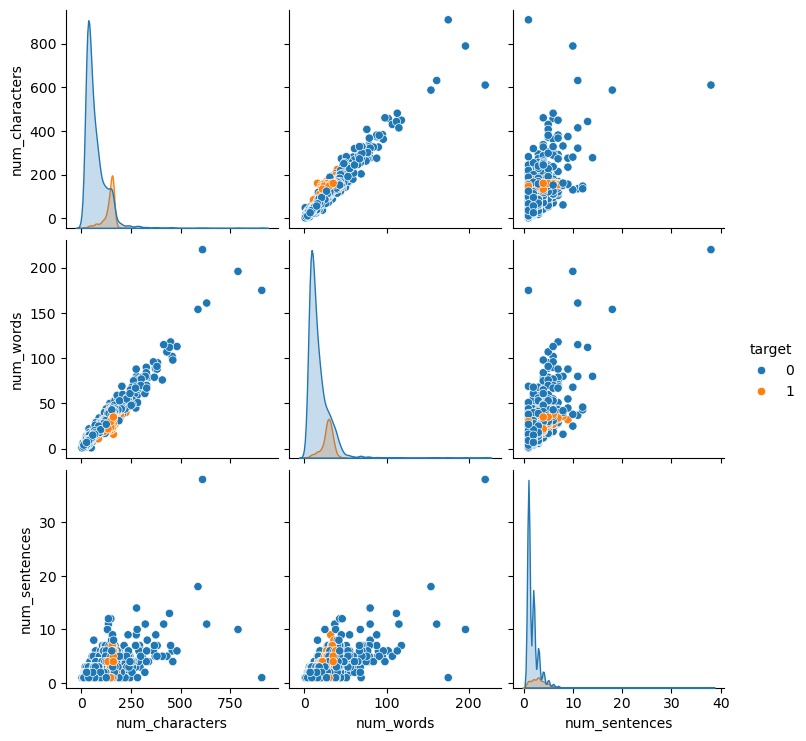

In [119]:
sns.pairplot(df,hue='target')

<Axes: >

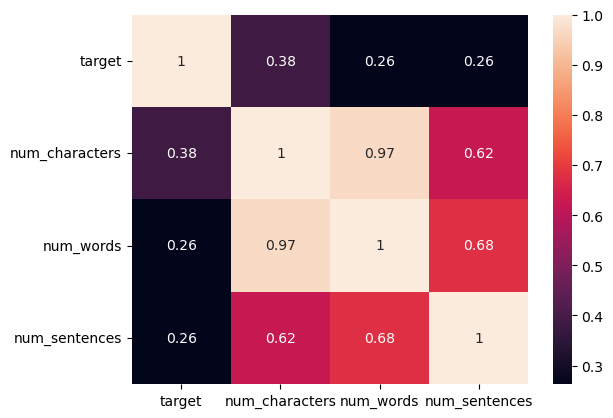

In [120]:
sns.heatmap(df.drop(columns=['text']).corr(), annot=True)

In [121]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [122]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

def transform_text(text):
    y = []
    for i in word_tokenize(text.lower()):  # tokenizing and lowering case
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    return " ".join(y)




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\niloy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\niloy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [123]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymore tonight k 've cried enough today"

In [124]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [125]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')


'love'

In [126]:
df['transformed_text'] = df['text'].apply(transform_text)

In [127]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [128]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [129]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [130]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

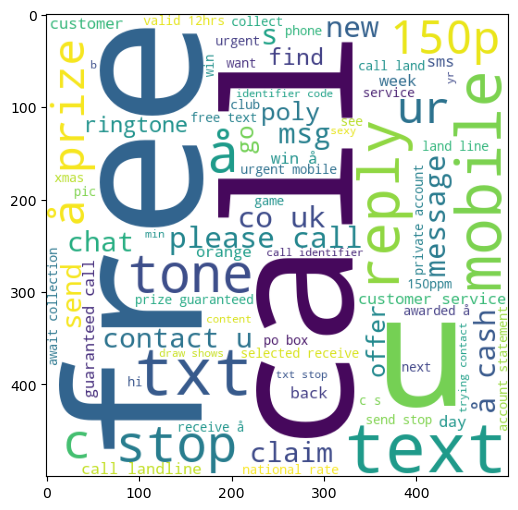

In [131]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)


In [132]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

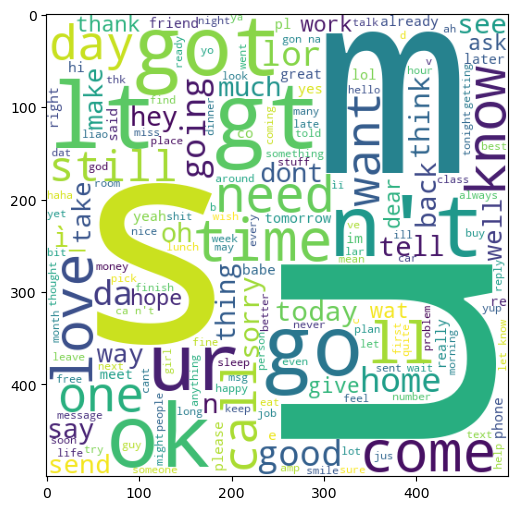

In [133]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [134]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [135]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [136]:
len(spam_corpus)

11083

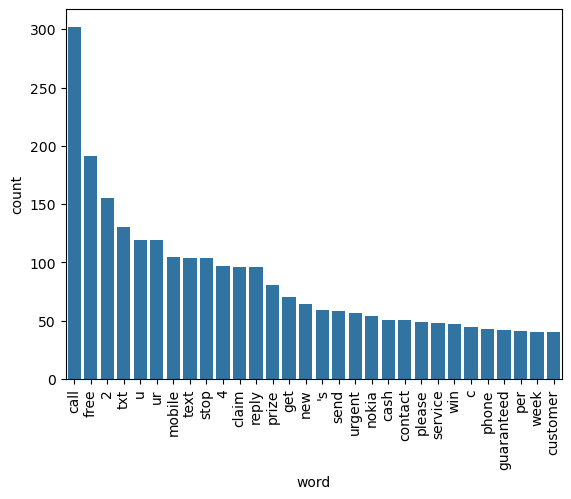

In [137]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from most common 30 words
common_words_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot with keyword arguments
sns.barplot(x='word', y='count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


In [138]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [139]:
len(ham_corpus)

39894

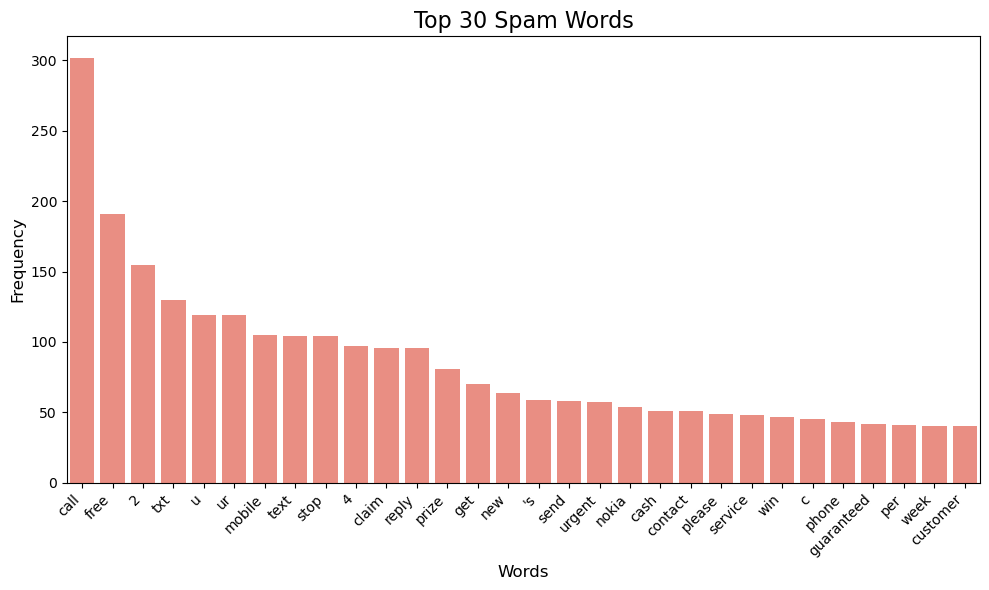

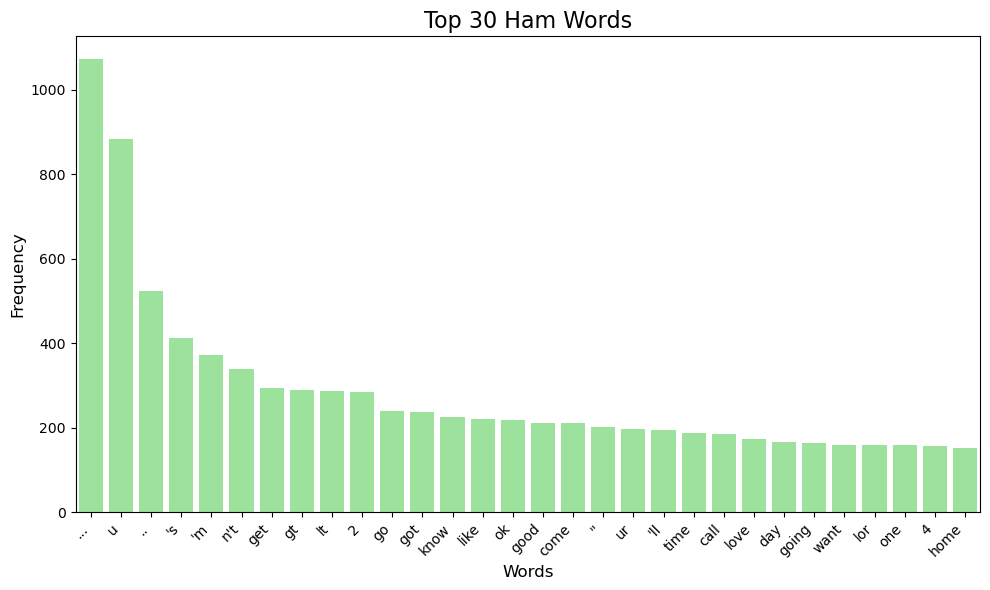

In [140]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_top_words(corpus, n=30, color='skyblue', title='Top Words'):
    # Create dataframe of most common words
    df = pd.DataFrame(Counter(corpus).most_common(n), columns=['word', 'count'])
    
    # Create plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='word', y='count', data=df, color=color)
    
    # Styling
    plt.xticks(rotation=45, ha='right')
    plt.title(title, fontsize=16)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel('Words', fontsize=12)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top_words(spam_corpus, n=30, color='salmon', title='Top 30 Spam Words')
plot_top_words(ham_corpus, n=30, color='lightgreen', title='Top 30 Ham Words')


In [141]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [142]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [143]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [144]:
X.shape

(5169, 3000)

In [145]:

y = df['target'].values

In [146]:

from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [148]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [149]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [150]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8897485493230174
[[803  93]
 [ 21 117]]
0.5571428571428572


In [151]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.97678916827853
[[895   1]
 [ 23 115]]
0.9913793103448276


In [152]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9874274661508704
[[895   1]
 [ 12 126]]
0.9921259842519685


In [153]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [157]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [158]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.975)

In [159]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.975
For  KN
Accuracy -  0.9061895551257253
Precision -  1.0
For  NB
Accuracy -  0.97678916827853
Precision -  0.9913793103448276
For  DT
Accuracy -  0.9429400386847195
Precision -  0.8761904761904762
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9591836734693877
For  RF
Accuracy -  0.97678916827853
Precision -  0.9830508474576272
For  AdaBoost
Accuracy -  0.9284332688588007
Precision -  0.9
For  BgC
Accuracy -  0.9613152804642167
Precision -  0.8769230769230769
For  ETC
Accuracy -  0.9806576402321083
Precision -  0.9836065573770492
For  GBDT
Accuracy -  0.9439071566731141
Precision -  0.9081632653061225
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9661016949152542


In [160]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [161]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.906190,1.000000
2,NB,0.976789,0.991379
8,ETC,0.980658,0.983607
5,RF,0.976789,0.983051
0,SVC,0.976789,0.975000
10,xgb,0.972921,0.966102
4,LR,0.953578,0.959184
9,GBDT,0.943907,0.908163
6,AdaBoost,0.928433,0.900000
7,BgC,0.961315,0.876923


In [162]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [163]:


performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.906190
1,NB,Accuracy,0.976789
2,ETC,Accuracy,0.980658
3,RF,Accuracy,0.976789
4,SVC,Accuracy,0.976789
5,xgb,Accuracy,0.972921
6,LR,Accuracy,0.953578
7,GBDT,Accuracy,0.943907
8,AdaBoost,Accuracy,0.928433
9,BgC,Accuracy,0.961315


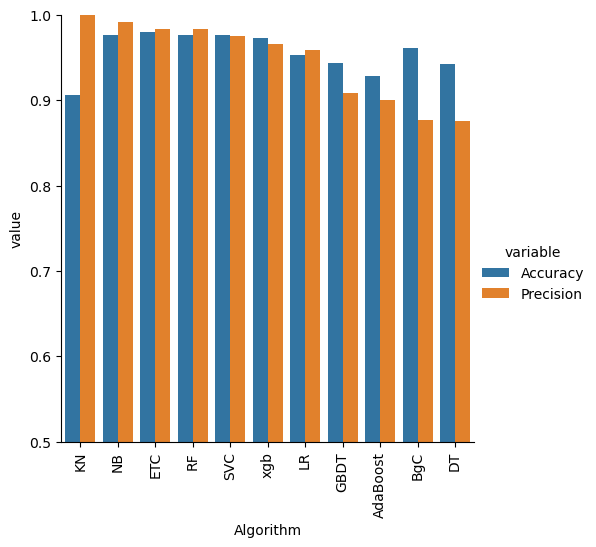

In [164]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [165]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [166]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [168]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [169]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [170]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [171]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000,0.906190,1.000000
1,NB,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379,0.976789,0.991379
2,ETC,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607,0.980658,0.983607
3,RF,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051,0.976789,0.983051
4,SVC,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000,0.976789,0.975000
5,xgb,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102,0.972921,0.966102
6,LR,0.953578,0.959184,0.953578,0.959184,0.953578,0.959184,0.953578,0.959184
7,GBDT,0.943907,0.908163,0.943907,0.908163,0.943907,0.908163,0.943907,0.908163
8,AdaBoost,0.928433,0.900000,0.928433,0.900000,0.928433,0.900000,0.928433,0.900000
9,BgC,0.961315,0.876923,0.961315,0.876923,0.961315,0.876923,0.961315,0.876923


In [172]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [173]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [174]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [175]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.984


In [176]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [177]:

from sklearn.ensemble import StackingClassifier

In [178]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [179]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9696969696969697


In [180]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [182]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# 1. Load your dataset
df = pd.read_csv("spam.csv", encoding="latin-1")  # Replace with your dataset
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# 2. Convert labels to 0/1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# 3. Vectorize text
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['message']).toarray()
y = df['label'].values

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 5. Train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# 6. Save both vectorizer and model
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(model, open('model.pkl', 'wb'))

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!
